In [27]:
%matplotlib nbagg
%matplotlib inline
import MDAnalysis as mda
import MDAnalysis.analysis.leaflet
import matplotlib
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import nglview as nv

import warnings
warnings.filterwarnings('ignore')

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# no GM1

name = '_DPPC_DIPC_chol_352'

path_data = '/mnt/modelo-nfs/data/Julie/DPPC_DIPC_GM1/3_5_2/DIPC_DPPC_chol/'
path_res = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol/'
fgro = 'start_mb.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1.xtc'

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 5% GM1

name = '_DPPC_DIPC_chol_352_5GM1_sup'

path_data = '/mnt/modelo-nfs/data/Julie/DPPC_DIPC_GM1/3_5_2/DIPC_DPPC_chol_GM1_5/'
path_res = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_5/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_20micros_mb_fixed_t1_ref19999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_20micros_mb_fixed_t1.xtc'

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 10% GM1

name = '_DPPC_DIPC_chol_352_10GM1_sup'

path_data = '/mnt/modelo-nfs/data/Julie/DPPC_DIPC_GM1/3_5_2/DIPC_DPPC_chol_GM1_10/'
path_res = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_10/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_10_43nm_20micros_mb_fixed_t1_ref19999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_10_43nm_20micros_mb_fixed_t1.xtc'

In [28]:
# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 20% GM1

name = '_DPPC_DIPC_chol_352_20GM1'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_20/'
path_data = path
path_res = path

fgro = 'run_DPPC_DIPC_CHOL_GM1_20_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_20_43nm_10ms_mb_fixed_t1.xtc'

In [29]:
u = mda.Universe( path_data+fgro, path_data+fxtc)

In [30]:
sel_all = u.select_atoms("all and resname DPPC")

for ts in u.trajectory:
    PO4 = u.select_atoms("name PO4 and resname DPPC") # and resname D*PC pour avoir juste les rouges

In [31]:
# visualize the bilayer and choose the frame to study

v= nv.show_mdanalysis(sel_all)
v.add_spacefill(sel_all, scale=2.0)
v

A Jupyter Widget

In [6]:
# Attention apparemment il y a un lipide qui dépasse dans la simus 3:5:2!
# contient 20000 frames

In [32]:
# select the atoms in the membrane and divide the bilayer into 2 leaflets selecting the species you want

sel_tot = "all and (name PO4 or name GM1)"


u.trajectory[2]
Lf = mda.analysis.leaflet.LeafletFinder(u, 'name PO4 or name GM1')
leaflet0 = Lf.groups(0)
leaflet1 = Lf.groups(1)

l0 = leaflet0.select_atoms(sel_tot).positions
l1 = leaflet1.select_atoms(sel_tot).positions
m_tot = u.select_atoms(sel_tot).positions

print('total number of lipids: %d' % len(m_tot))
print('number of lipids in the upper leaflet: %d + number of lipids in the lower leaflet:%d \n= %d' % (len(l0),len(l1),len(l0)+len(l1)))

if (len(m_tot) != len(l0)+len(l1) ):
    print('PROBLEM!')

total number of lipids: 5019
number of lipids in the upper leaflet: 2599 + number of lipids in the lower leaflet:2420 
= 5019


In [34]:
# TAKE THE LAST FRAME

u.trajectory[9999]

< Timestep 9999 with unit cell dimensions [415.6564  415.6564  216.33116  90.       90.       90.     ] >

Text(0.5,1,'Répartition des espèces')

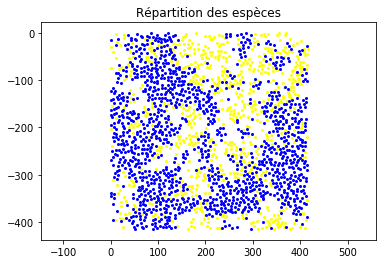

In [35]:
xmin=0
ymin=0

Lo = leaflet0.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name PO4 and resname DPPC").positions
Ld = leaflet0.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name PO4 and resname DIPC").positions
plt.scatter(Lo[:,1], -Lo[:,0], marker='o', c='yellow', s=4)
plt.scatter(Ld[:,1], -Ld[:,0], marker='o', c='b', s=4)

plt.axis('equal')
plt.title('Répartition des espèces',fontsize=12)

In [36]:
print(np.shape(Lo))
print(np.shape(Ld))

(690, 3)
(1334, 3)


In [37]:
# create a matrix for each phase with a 4th column that returns 1 if the phase is Lo and 0 if it's Ld

Lo2 = np.zeros((len(Lo),4))
Lo2[:,0] = Lo[:,0]
Lo2[:,1] = Lo[:,1]
Lo2[:,2] = Lo[:,2]
Lo2[:,3] = 1

Ld2 = np.zeros((len(Ld),4))
Ld2[:,0] = Ld[:,0]
Ld2[:,1] = Ld[:,1]
Ld2[:,2] = Ld[:,2]
Ld2[:,3] = 0

print(Lo2)
print(Ld2)

[[ 79.79000854  42.19000244  59.52000046   1.        ]
 [ 84.07000732 332.86004639 115.62000275   1.        ]
 [ 52.13000488 236.1900177  116.07000732   1.        ]
 ...
 [392.12002563 337.98999023 104.96000671   1.        ]
 [299.69000244 306.65002441  63.24000549   1.        ]
 [296.2800293  182.47001648  62.54000092   1.        ]]
[[  5.44000053 267.43002319 120.46000671   0.        ]
 [ 19.86000061 274.11999512 120.43000031   0.        ]
 [301.30999756 226.79000854  71.77000427   0.        ]
 ...
 [102.58000183 195.02999878  91.27000427   0.        ]
 [374.33001709 386.8800354   81.63000488   0.        ]
 [120.81000519  93.95000458  50.79000473   0.        ]]


In [38]:
# create a matrix combining the previous information for both leaflet on which one can perform the neighboring analysis

Mc=np.vstack((Lo2,Ld2))
print(Mc)

[[ 79.79000854  42.19000244  59.52000046   1.        ]
 [ 84.07000732 332.86004639 115.62000275   1.        ]
 [ 52.13000488 236.1900177  116.07000732   1.        ]
 ...
 [102.58000183 195.02999878  91.27000427   0.        ]
 [374.33001709 386.8800354   81.63000488   0.        ]
 [120.81000519  93.95000458  50.79000473   0.        ]]


(2024, 4)


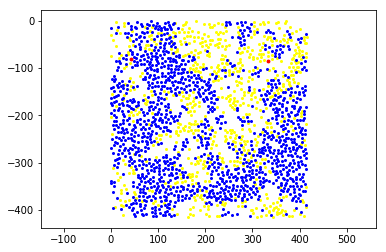

In [39]:
# test to check how is organized the matrix

print(np.shape(Mc))
f, (ax) = plt.subplots(1)

for i in range(len(Mc)):
    if Mc[i,3]==1:
        ax.scatter(Mc[i,1], -Mc[i,0], marker='o', c='yellow', s=4)
    else:
        ax.scatter(Mc[i,1], -Mc[i,0], marker='o', c='b', s=4)
plt.axis('equal')

ax.scatter(Mc[0,1], -Mc[0,0], marker='o', c='r', s=8)
ax.scatter(Mc[1,1], -Mc[1,0], marker='o', c='r', s=8)
# on voit que les points voisins dans la liste ne le sont pas dans le plan

Neighbors found within the radius d:
72
388


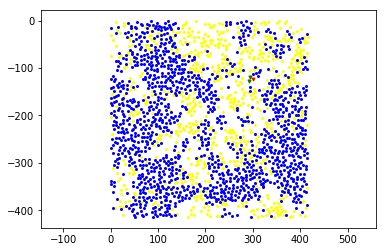

In [40]:
# check which neighbors are considered

d = 13 # cut-off distance to tune
print('Neighbors found within the radius d:')

i = 404 #28
xi = Mc[i,0]
yi = Mc[i,1]
zi = Mc[i,2]
spi = Mc[i,3]

f, (ax) = plt.subplots(1)

ax.scatter(Lo[:,1], -Lo[:,0], marker='o', c='yellow', s=4)
ax.scatter(Ld[:,1], -Ld[:,0], marker='o', c='b', s=4)

ax.scatter(Mc[i,1], -Mc[i,0], marker='v', c='red', s=8)
plt.axis('equal')

for j in range(len(Mc)):
    xj = Mc[j,0]
    yj = Mc[j,1]
    zj = Mc[j,2]
    spj = Mc[j,3]
    
    if (xj-xi)**2+(yj-yi)**2+(zj-zi)**2 <= d**2 and j!=i:
        print(j)
        ax.scatter(Mc[j,1], -Mc[j,0], marker='v', c='orange', s=8)
        if spj==spi :
            ax.scatter(Mc[j,1], -Mc[j,0], marker='v', c='green', s=8)
        
plt.savefig(path_res+'neighbors'+name+'.pdf', format='pdf',bbox_inches='tight')

In [44]:
d = 13 # distance à afiner en A
# diviser par le nombre de voisins trouvés pour uniformiser ?
cpt_neigh_tot = 0 # compte le nb de voisins
cpt_neigh_sp = 0 # compte le nb de voisins de la même espèce

for i in range(len(Mc)):
    xi = Mc[i,0]
    yi = Mc[i,1]
    zi = Mc[i,2]
    spi = Mc[i,3] #valeur de la case espèce

    for j in range(len(Mc)):
        xj = Mc[j,0]
        yj = Mc[j,1]
        zj = Mc[j,2]
        spj = Mc[j,3]

        if (xj-xi)**2+(yj-yi)**2+(zj-zi)**2 <= d**2 and j!=i:
            cpt_neigh_tot+=1
            if spj==spi :
                cpt_neigh_sp+=1
                
print(cpt_neigh_tot)
print(cpt_neigh_tot/len(Mc))
print(cpt_neigh_sp)
print(cpt_neigh_sp/len(Mc))

10044
4.98956780923994
6620
3.288623944361649


In [45]:
time_simu = 10 # microseconds
nb_frames_simu = 10000

In [46]:
# compute the mean number of neighbors of the same species through time

tmes = 100 # frequency of the measure

time = []
neigh_tot = []
neigh_sp = []

Lf = mda.analysis.leaflet.LeafletFinder(u, "name PO4")
leaflet0 = Lf.groups(0)
leaflet1 = Lf.groups(1)

for ts in u.trajectory:
     if (ts.frame%tmes == 0):
            print(ts.frame)
            time.append(ts.frame/ (nb_frames_simu/time_simu))
            
            xmin=0
            ymin=0
            Lo = leaflet0.select_atoms("name PO4 and resname DPPC").positions
            Ld = leaflet0.select_atoms("name PO4 and resname DIPC").positions

            Lo2 = np.zeros((len(Lo),4))
            Lo2[:,0] = Lo[:,0]
            Lo2[:,1] = Lo[:,1]
            Lo2[:,2] = Lo[:,2]
            Lo2[:,3] = 1

            Ld2 = np.zeros((len(Ld),4))
            Ld2[:,0] = Ld[:,0]
            Ld2[:,1] = Ld[:,1]
            Ld2[:,2] = Ld[:,2]
            Ld2[:,3] = 0
            
            Mc=np.vstack((Lo2,Ld2))
            
            d = 13 # distance à afiner 
            # diviser par le nombre de voisins trouvés pour uniformiser ?
            cpt_neigh_tot = 0 # compte le nb de voisins
            cpt_neigh_sp = 0 # compte le nb de voisins de la même espèce

            for i in range(len(Mc)):
                xi = Mc[i,0]
                yi = Mc[i,1]
                zi = Mc[i,2]
                spi = Mc[i,3] #valeur de la case espèce

                for j in range(len(Mc)):
                    xj = Mc[j,0]
                    yj = Mc[j,1]
                    zj = Mc[j,2]
                    spj = Mc[j,3]

                    if (xj-xi)**2+(yj-yi)**2+(zj-zi)**2 <= d**2 and j!=i :
                        cpt_neigh_tot+=1
                        if spj==spi :
                            cpt_neigh_sp+=1
                            
            neigh_tot.append(cpt_neigh_tot/len(Mc))
            neigh_sp.append(cpt_neigh_sp/len(Mc))
              

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


In [47]:
print(time)
print(neigh_tot)
print(neigh_sp)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]
[4.706870983687593, 4.8877904102817595, 4.886801779535343, 4.993573900148295, 5.001482946119625, 5.016312407315867, 5.003460207612457, 5.101334651507662, 5.015323776569451, 5.088482451804251, 5.09935739001483, 5.107266435986159, 5.092436974789916, 5.097380128521997, 5.089471082550667, 5.1122095897182405, 5.0746416213544245, 5.119130004943154, 5.086505190311419, 5.138902619871478, 5.1300049431537325, 5.155709342560554, 5.173504695996045, 5.216015818091942, 5.151754819574888, 5.181413741967376, 5

In [51]:
np.save(path_res+'time_phase_sep.npy', time)
np.save(path_res+'neigh_tot'+name+'.npy', neigh_tot)
np.save(path_res+'neigh_sp'+name+'.npy', neigh_sp)

In [49]:
name0 = '_DPPC_DIPC_chol_352'
path_res0 = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol/'
name5 = '_DPPC_DIPC_chol_352_5GM1_sup'
path_res5 = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_5/'
name10 = '_DPPC_DIPC_chol_352_10GM1_sup'
path_res10 = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_10/'
name20 = '_DPPC_DIPC_chol_352_20GM1'
path_res20 = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_20/'

In [53]:
t = np.load(path_res5+'time_phase_sep.npy')

l0t = np.load(path_res0+'neigh_tot'+name0+'.npy')
l0s = np.load(path_res0+'neigh_sp'+name0+'.npy')

l5t = np.load(path_res5+'neigh_tot'+name5+'.npy')
l5s = np.load(path_res5+'neigh_sp'+name5+'.npy')

l10t = np.load(path_res10+'neigh_tot'+name10+'.npy')
l10s = np.load(path_res10+'neigh_sp'+name10+'.npy')

l20t = np.load(path_res20+'neigh_tot'+name20+'.npy')
l20s = np.load(path_res20+'neigh_sp'+name20+'.npy')


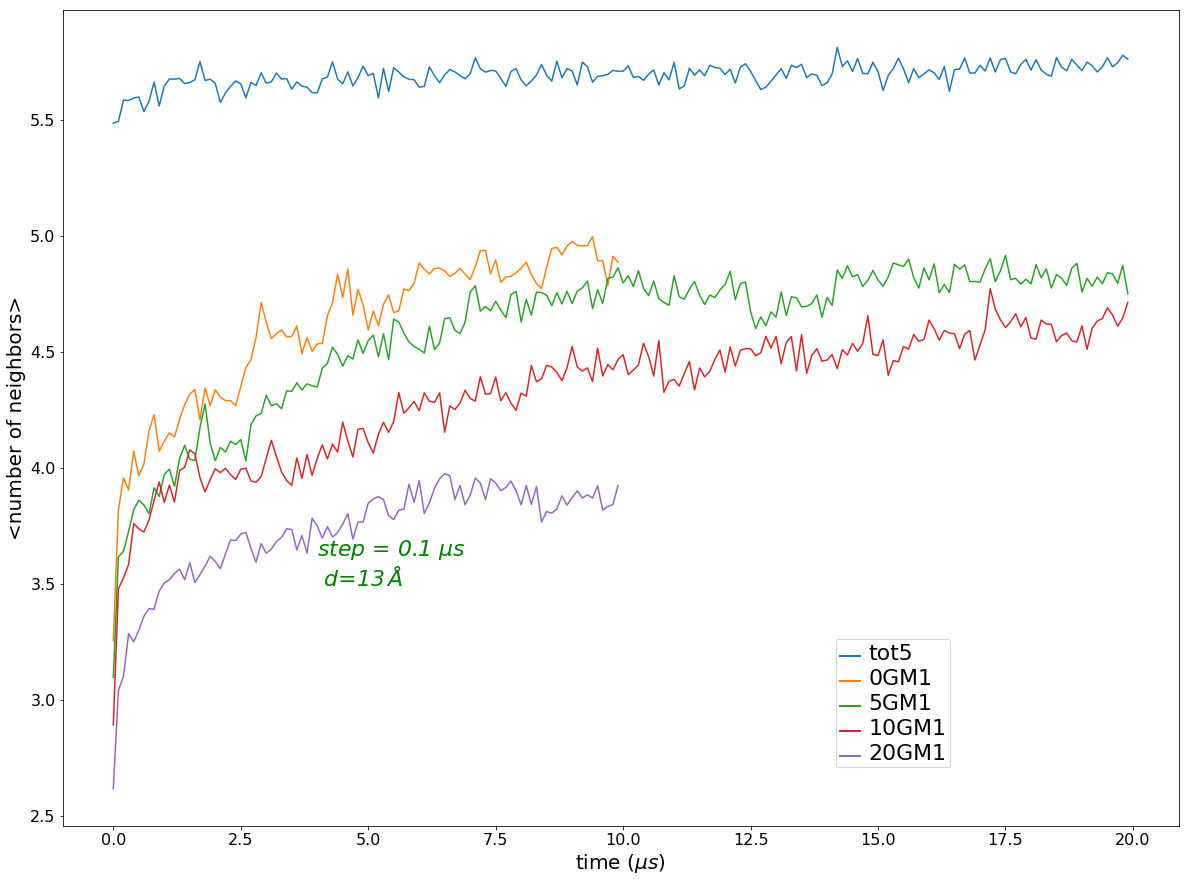

In [57]:
# plot of the mean number of neighbors of the same species and the total mean number of neighbors through time
fig, ax = plt.subplots(figsize=(20, 15))

#ax.plot(time,neigh_tot,label = 'total')
#ax.plot(time,neigh_sp, label = 'same species')

ax.plot(t,l5t,label = 'tot5')

ax.plot(t[:100],l0s,label = '0GM1')
ax.plot(t,l5s,label = '5GM1')
ax.plot(t,l10s,label = '10GM1')
ax.plot(t[:100],l20s,label = '20GM1')

plt.xlabel('time ($\mu s$)',fontsize=20)
plt.ylabel('<number of neighbors>',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.annotate('step = %.1lf $\mu s$\n d=%d$\, \AA$' % (tmes/ (nb_frames_simu/time_simu), d ), color='g', fontsize=22, style='italic', xy=(4,3.5), xytext=(4,3.5))


legend = ax.legend(loc='right', bbox_to_anchor=(0.8, 0.15))
# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
#frame.set_facecolor('0.90')
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize(22)
for label in legend.get_lines():
    label.set_linewidth(2)  # the legend line width

plt.savefig(path_res+'neigh_time'+name+'.pdf', format='pdf',bbox_inches='tight')

In [65]:
tx = np.array(time)
ny = np.array(neigh_sp)

[1.01351151 6.46203953 3.62991106]


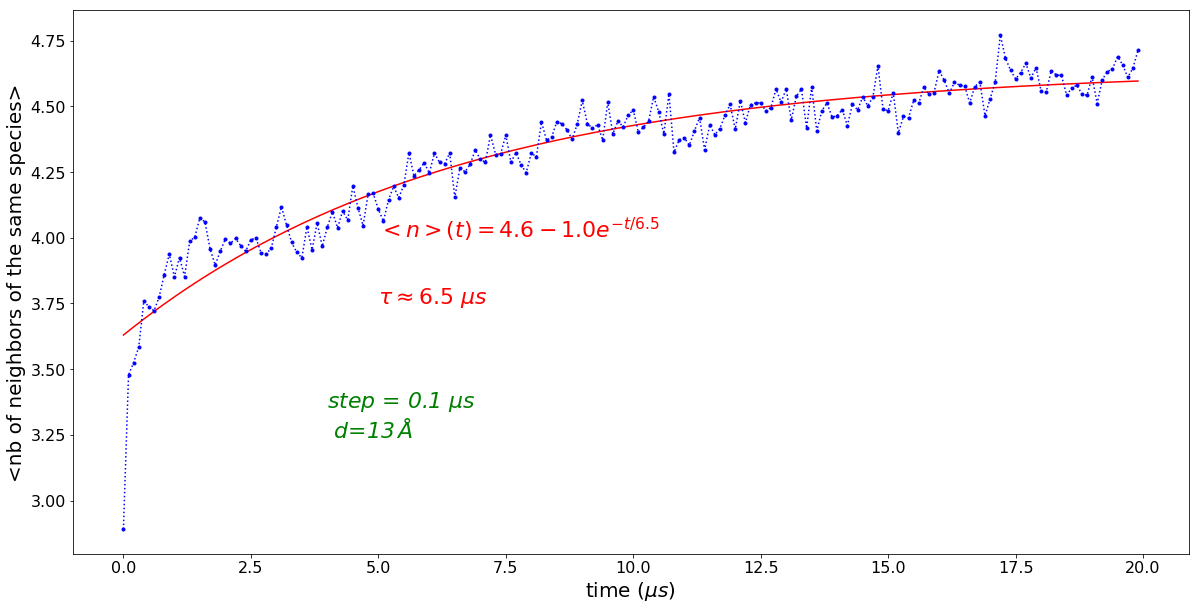

In [66]:
#------------------Fit pour une simulation----------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

def fitFunc(t,A,tau,B):
        return A*(1-np.exp(-t/tau)) + B

start = [10.0,1.0,2.0]
#param_bounds=([0,0,0],[100,100,10000])

param, evol = curve_fit(fitFunc, tx, ny, p0 = start) #bounds=param_bounds
print(param)


ax.plot(tx,fitFunc(tx, *param), 'red')
ax.plot(tx, ny, ':b.')

plt.xlabel('time ($\mu s$)',fontsize=20)
plt.xticks(fontsize=16)
plt.ylabel('<nb of neighbors of the same species>',fontsize=20)
plt.yticks(fontsize=16)
plt.annotate('$ <n>(t)= %.1f- %.1fe^{-t/ %.1f } $' % (param[0]+param[2],param[0],param[1]), color='red', fontsize=22, style='italic',xy=(5,4), xytext=(5, 4))
plt.annotate('$ \\tau \\approx %.1f$ $\mu s$' % param[1], color='red', fontsize=22, style='italic',xy=(5,4), xytext=(5, 3.75))
plt.annotate('step = %.1lf $\mu s$\n d=%d$\, \AA$' % (tmes/ (nb_frames_simu/time_simu), d ), color='g', fontsize=22, style='italic', xy=(4,3.5), xytext=(4,3.25))

plt.savefig(path_res+'fit_neigh_time'+name+'.pdf', format='pdf',bbox_inches='tight')